In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Data Exploration

In [408]:
rd = pd.read_csv('CarPrice.csv')
rd = pd.DataFrame(rd)
rd

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [409]:
rd.drop(['car_ID','CarName'],inplace= True,axis = 1)
rd

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [410]:
rd.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Data Transform and Feature Selection

In [411]:
dataV = rd[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
dataO = rd[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]
Y = dataV.filter(["price"])
dataV.drop(columns = ['price'],inplace = True,axis = 1)
dataCorr = dataV.corr()
dataCorr

/var/folders/cy/8gk9k6q514gcdtsy9630wd1h0000gn/T/ipykernel_77083/3910825444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataV.drop(columns = ['price'],inplace = True,axis = 1)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


In [412]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.0


In [413]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]
dataV.drop(to_drop, inplace=True, axis=1)
print(to_drop)
dataV

['wheelbase', 'carlength', 'carwidth', 'citympg']


/var/folders/cy/8gk9k6q514gcdtsy9630wd1h0000gn/T/ipykernel_77083/116451509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataV.drop(to_drop, inplace=True, axis=1)


,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27
1,3,48.8,2548,130,3.47,2.68,9.0,111,5000,27
2,1,52.4,2823,152,2.68,3.47,9.0,154,5000,26
3,2,54.3,2337,109,3.19,3.40,10.0,102,5500,30
4,2,54.3,2824,136,3.19,3.40,8.0,115,5500,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,3.15,9.5,114,5400,28
201,-1,55.5,3049,141,3.78,3.15,8.7,160,5300,25
202,-1,55.5,3012,173,3.58,2.87,8.8,134,5500,23
203,-1,55.5,3217,145,3.01,3.40,23.0,106,4800,27


In [414]:
from sklearn.preprocessing import OneHotEncoder

In [415]:
dataO = pd.get_dummies(dataO,drop_first=True)
dataO

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [416]:
DataAll = dataV.join(dataO)
DataAll.describe()

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,30.751220,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.886443,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,34.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,54.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


PCA 

In [417]:
pca = PCA()
X_pca = pca.fit_transform(DataAll)
R1 = range(len(DataAll.columns))
print(R1)

range(0, 39)


In [418]:
for i in range (5,31,5):
    print(i)

5
10
15
20
25
30


In [419]:
print('Explained Variance ratio = ', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) along row ')
print(pca.components_[0:10])
x_n_component = []
for i in range (5,31,5):
    pca2 = PCA(n_components=i)
    X_pca_2 = pca2.fit_transform(DataAll)
    x_n_component.append(X_pca_2)
print(x_n_component)
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA2 components (eigenvectors) ')
print(pca2.components_[0:5])
R2= range(len(DataAll.columns))

Explained Variance ratio =  [6.38136466e-01 3.59861391e-01 1.54831407e-03 3.92523090e-04
 3.60800494e-05 1.12473166e-05 8.19117746e-06 2.08036177e-06
 6.63377093e-07 6.53029378e-07 4.33882972e-07 3.25514879e-07
 3.14183487e-07 2.44250577e-07 1.74069909e-07 1.57186594e-07
 1.14823621e-07 1.11813241e-07 9.84160415e-08 8.44755910e-08
 6.26087379e-08 6.16408525e-08 4.20995369e-08 3.50434048e-08
 2.74781500e-08 2.33968270e-08 1.71347439e-08 1.25433797e-08
 1.07076152e-08 8.87321016e-09 7.62999061e-09 6.80356128e-09
 5.39283817e-09 4.31205847e-09 3.79082010e-09 1.33371405e-09
 9.61563642e-10 5.61208742e-33 5.61208742e-33]
Explained Variance (eigenvalues) =  [3.20341262e+05 1.80648589e+05 7.77245792e+02 1.97044596e+02
 1.81120014e+01 5.64609577e+00 4.11192945e+00 1.04433103e+00
 3.33011929e-01 3.27817429e-01 2.17807046e-01 1.63406815e-01
 1.57718513e-01 1.22612548e-01 8.73822094e-02 7.89068710e-02
 5.76408743e-02 5.61296787e-02 4.94043526e-02 4.24063173e-02
 3.14292682e-02 3.09433947e-02 2.11

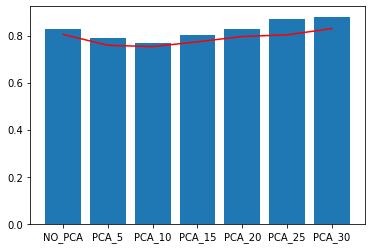

In [420]:
rseed = 99
x_train_set, x_test, y_train_set, y_test = train_test_split(DataAll,Y, test_size = 0.3, random_state = rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = rseed)
lr = LinearRegression()
# train
lr.fit(x_train, y_train)
# validate
y_pred_lr = lr.predict(x_validate)
# test
y_test_pred_lr = lr.predict(x_test)
# Measure Accuracy Validation and Test
r2accvalid = [0,5,10,15,20,25,30]
r2accvalid[0] = r2_score(y_pred_lr, y_validate)
r2acctest = [0,5,10,15,20,25,30]
r2acctest[0] = r2_score(y_test_pred_lr, y_test)
msevalid = [0,5,10,15,20,25,30]
msevalid[0] = mean_squared_error(y_pred_lr, y_validate)
msetest = [0,5,10,15,20,25,30]
msetest[0] = mean_squared_error(y_test_pred_lr, y_test)
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = rseed)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = rseed)
    lr = LinearRegression()
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    r2accvalid[i+1] = r2_score(y_pred_lr, y_validate)
    r2acctest[i+1] = r2_score(y_test_pred_lr, y_test)
    msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate)
    msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],r2accvalid)
plt.plot(r2acctest,color= 'r')
plt.show()

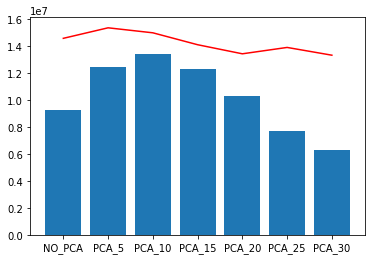

In [421]:
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],msevalid)
plt.plot(msetest,color = 'r')
plt.show()